# CIFAR-10 Image Classification using CNN

This project builds a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset. CIFAR-10 contains 60,000 color images (32x32 pixels) categorized into 10 classes:

🚗 Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, and Truck.

We use TensorFlow and Keras to construct a CNN that learns image features and classifies them accurately.

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

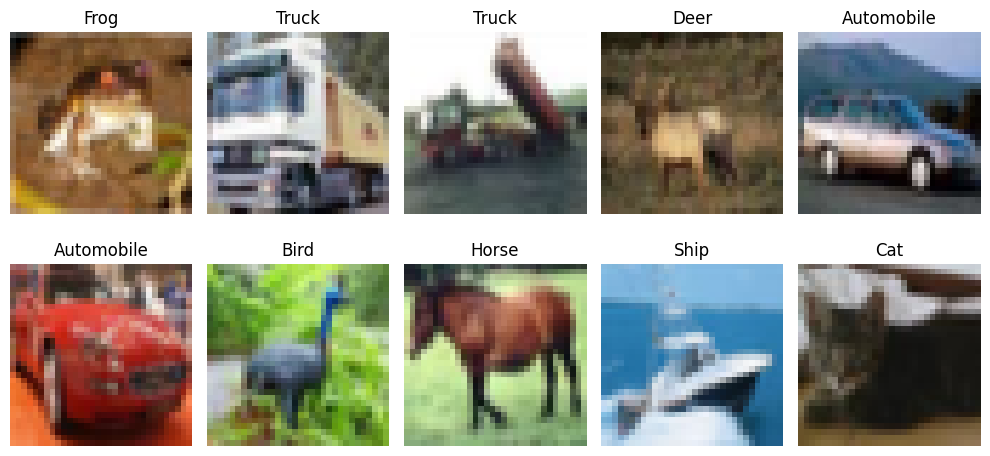

In [8]:
class_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)  # Arrange images in 2 rows, 5 columns
    plt.imshow(x_train[i])  # Show image
    plt.title(class_labels[y_train[i][0]])  # Set title as class name
    plt.axis("off")  # Hide axes

plt.tight_layout()
plt.show()

In [9]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [10]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


First Convolutional Layer (Conv2D(32, (3,3), activation='relu'))

Uses 32 filters of size 3x3 to extract image features.
ReLU activation introduces non-linearity to learn complex patterns.
Input shape: (32, 32, 3) for CIFAR-10 (32x32 RGB images).
First Pooling Layer (MaxPooling2D((2,2)))

Performs 2x2 max pooling, reducing image size to half while retaining important details.
Second Convolutional Layer (Conv2D(64, (3,3), activation='relu'))

Uses 64 filters to detect more complex features.
Second Pooling Layer (MaxPooling2D((2,2)))

Further reduces image dimensions.
Third Convolutional Layer (Conv2D(128, (3,3), activation='relu'))

Uses 128 filters for high-level feature extraction.
Flattening (Flatten())

Converts the 2D feature maps into a 1D vector for classification.
Fully Connected Layer (Dense(256, activation='relu'))

Applies 256 neurons to learn high-level representations.
Dropout Layer (Dropout(0.5))

Randomly drops 50% of neurons to prevent overfitting.
Output Layer (Dense(10, activation='softmax'))

Uses softmax activation to output probabilities for 10 CIFAR-10 categories.

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - accuracy: 0.2906 - loss: 1.9020 - val_accuracy: 0.5002 - val_loss: 1.3786
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 69ms/step - accuracy: 0.5210 - loss: 1.3354 - val_accuracy: 0.5815 - val_loss: 1.1837
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 62ms/step - accuracy: 0.5937 - loss: 1.1403 - val_accuracy: 0.6125 - val_loss: 1.0884
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.6331 - loss: 1.0360 - val_accuracy: 0.6428 - val_loss: 1.0019
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.6718 - loss: 0.9275 - val_accuracy: 0.6770 - val_loss: 0.9158
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.7000 - loss: 0.8595 - val_accuracy: 0.7054 - val_loss: 0.8626
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.7238 - loss: 0.7896 - val_accuracy: 0.7051 - val_loss: 0.8668
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.7451 - loss: 0.7319 - 

In [14]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 71.99%


In [15]:
model.save("cifar10_cnn_model.h5")
print("Model saved as 'cifar10_cnn_model.h5'")

Model saved as 'cifar10_cnn_model.h5'


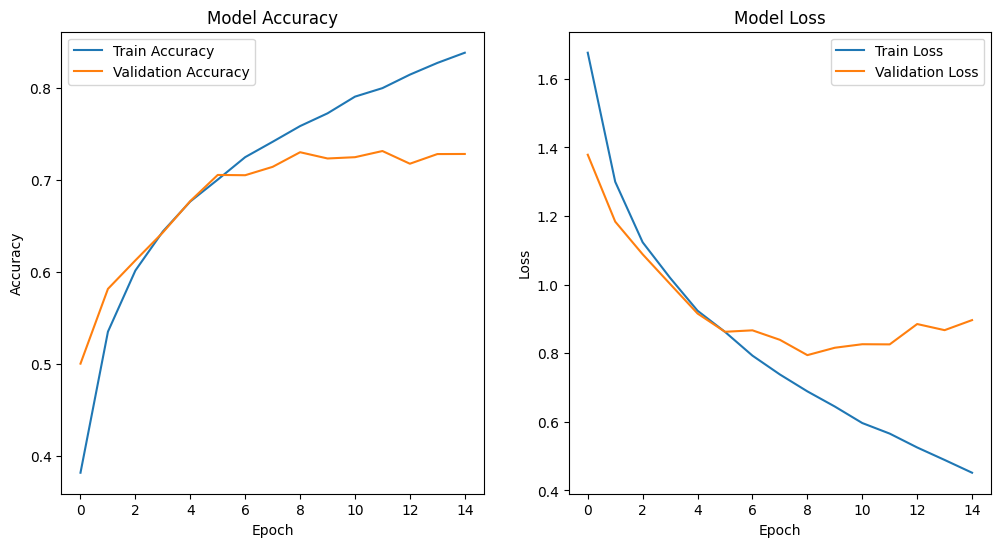

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [27]:
x_test_flatten = x_test.astype("float32") / 255.0

# CIFAR-10 class labels
class_labels = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]


def predict_image(index):
    """
    Takes an index from y_test, retrieves the corresponding image, predicts its class,
    and displays the image along with the predicted label.

    Parameters:
        index (int): The index of the image in y_test to be predicted.
    """
    if index < 0 or index >= len(x_test_flatten):
        print("Error: Index out of range. Please provide an index between 0 and", len(x_test_flatten) - 1)
        return

    img = x_test_flatten[index]
    true_label = class_labels[int(y_test[index][0])]  # Convert to int before indexing

    img_array = np.expand_dims(img, axis=0)  # Add batch dimension

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)  # Get class index
    predicted_label = class_labels[predicted_class]  # Get predicted class label

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label} | True: {true_label}")
    plt.axis("off")
    plt.show()

    print(f"Model Prediction: {predicted_label} (Class {predicted_class})")
    print(f"True Label: {true_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


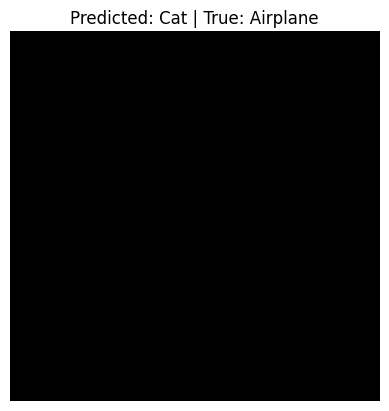

Model Prediction: Cat (Class 3)
True Label: Airplane


In [29]:
predict_image(25)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


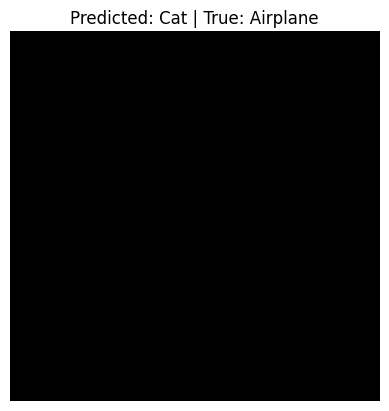

Model Prediction: Cat (Class 3)
True Label: Airplane


In [30]:
predict_image(2)